# Comparison of the effects of different scalers

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler
)

In [2]:
sns.set_theme(style='whitegrid', rc={
    'axes.facecolor': (0, 0, 0, 0),
    'axes.edgecolor': (0, 0, 0, 0),
    'axes.grid': False,
    'figure.figsize': (10, 8)
    }
    )

In [3]:
results_dir = Path('../../results')
train = pd.read_csv(results_dir / 'train_clean.csv')

In [4]:
num_cols = train.dtypes[(train.dtypes == 'float64') | (train.dtypes == 'int64')].index
num_cols

Index(['startYear', 'runtimeMinutes', 'numVotes', 'totalImages',
       'totalCredits', 'numRegions', 'companiesNumber', 'averageRating',
       'externalLinks', 'writerCredits', 'numGenres', 'criticReviewsRatio'],
      dtype='object')

In [5]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train[num_cols])

In [6]:
train_standard = pd.DataFrame(train_X, columns=num_cols)

In [7]:
min_x = train_standard.quantile(.05).min()
max_x = train_standard.quantile(.95).max()

In [8]:
pal = sns.cubehelix_palette(len(num_cols), rot=-.25, light=.7)

In [9]:
def make_ridge_plot(scaling_function=None, name="No scaler"):
    # Scale data
    if scaling_function:
        scaler = scaling_function()
        train_standard = pd.DataFrame(scaler.fit_transform(train[num_cols]), columns=num_cols)
    else:
        train_standard = train[num_cols]

    fig, ax = plt.subplots(nrows=len(num_cols), ncols=1, sharex=True)

    for i, col in enumerate(num_cols):
        sns.kdeplot(train_standard, x=col, ax=ax[i], fill=True, alpha=1, lw=.5, color=pal[i])
        sns.kdeplot( train_standard, x=col, ax=ax[i], color="w", lw=.7)
        ax[i].set_ylabel(col, rotation=0)
        ax[i].xaxis.set_label_text('')
        ax[i].set_yticks([])
        ax[i].yaxis.set_label_coords(-.1, 0)

    # Set the subplots to overlap
    fig.subplots_adjust(hspace=-.25)
    fig.suptitle(f"Ridge Plot of numeric features scaled with {name}")

## No scaling

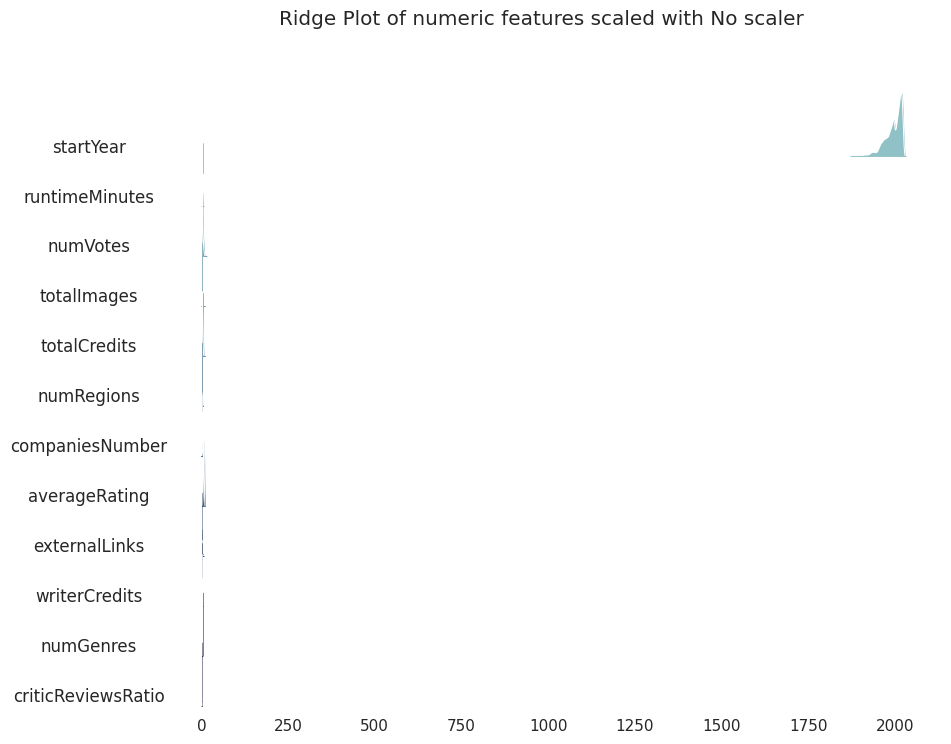

In [10]:
make_ridge_plot()

## Maximum Absolute Scaler

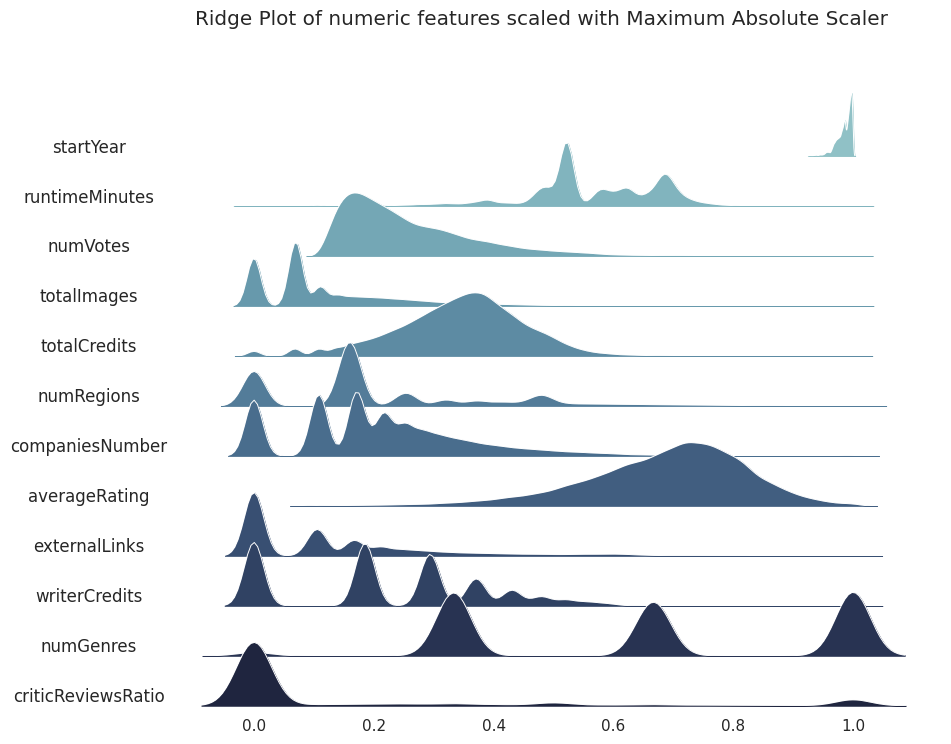

In [11]:
make_ridge_plot(MaxAbsScaler, 'Maximum Absolute Scaler')

## MinMax Scaler

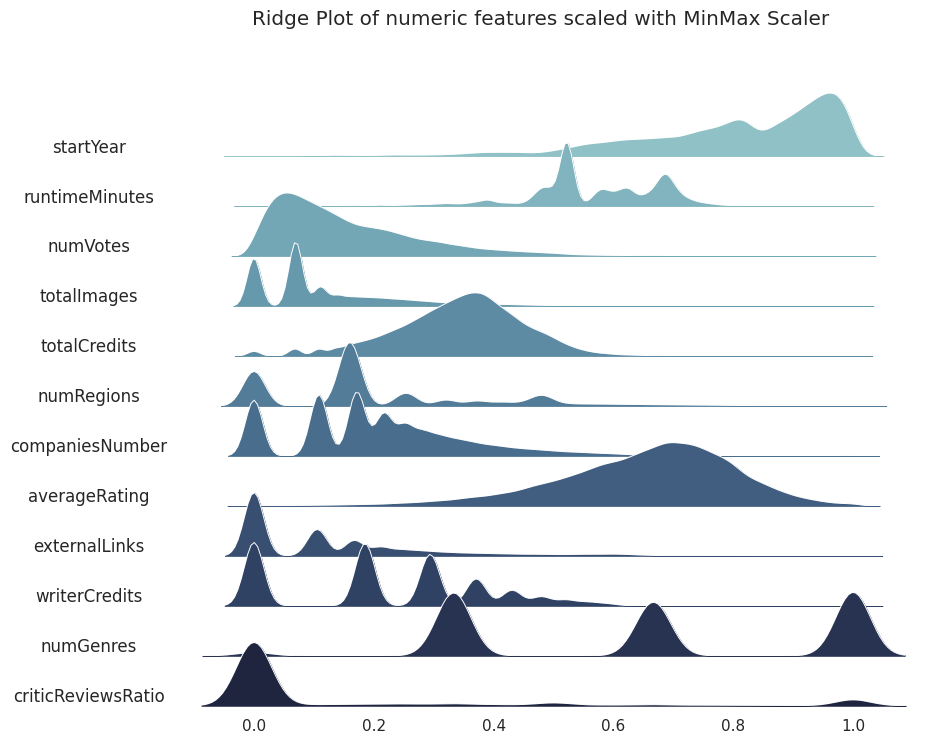

In [12]:
make_ridge_plot(MinMaxScaler, 'MinMax Scaler')

## Quantile Transformer

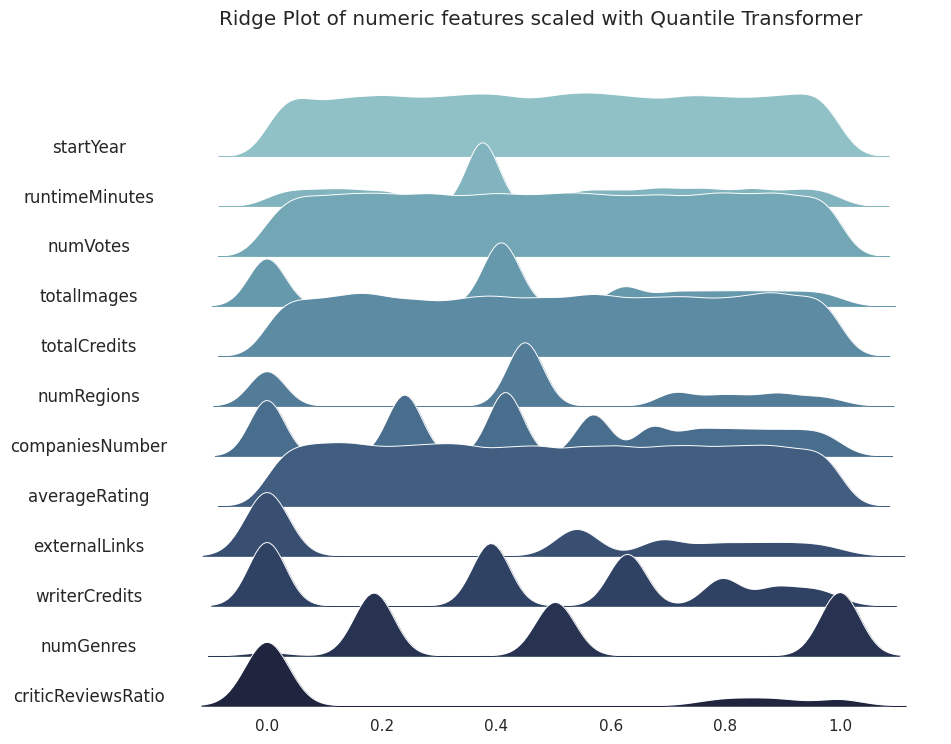

In [13]:
make_ridge_plot(QuantileTransformer, 'Quantile Transformer')

## Robust Scaler

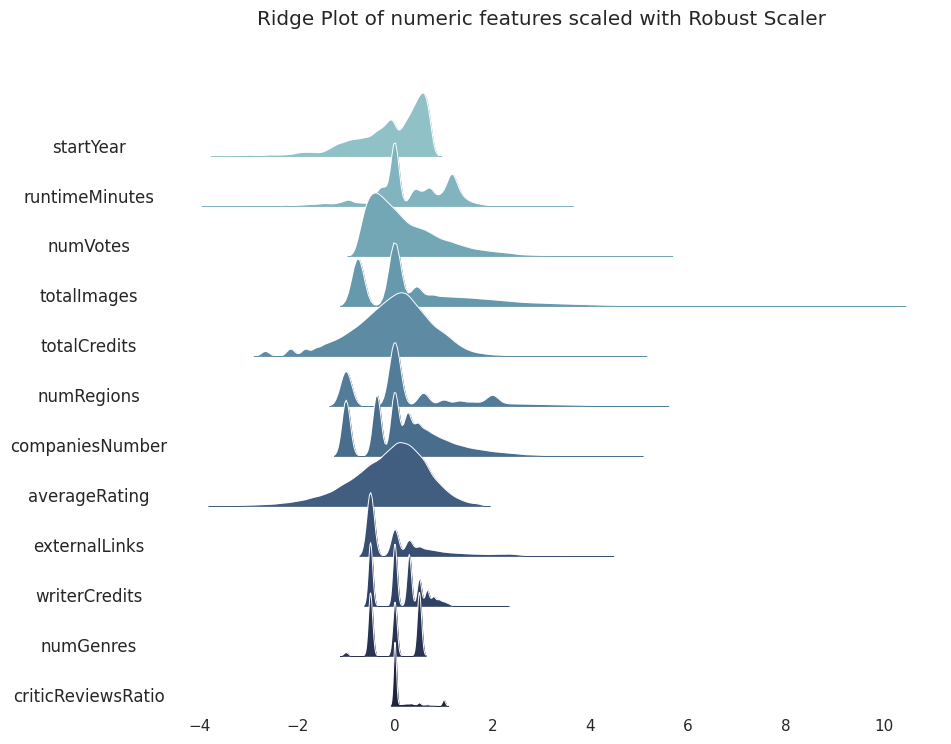

In [14]:
make_ridge_plot(RobustScaler, 'Robust Scaler')

Removes the median and scales the data according to the IQR (while standard scaling removes the mean nad scales to unit variance).
Since outliers can negatively influence sample mean and variance, this is probably preferrable.

In both cases outliers themselves are still present in the transformed data.

## Standard Scaler

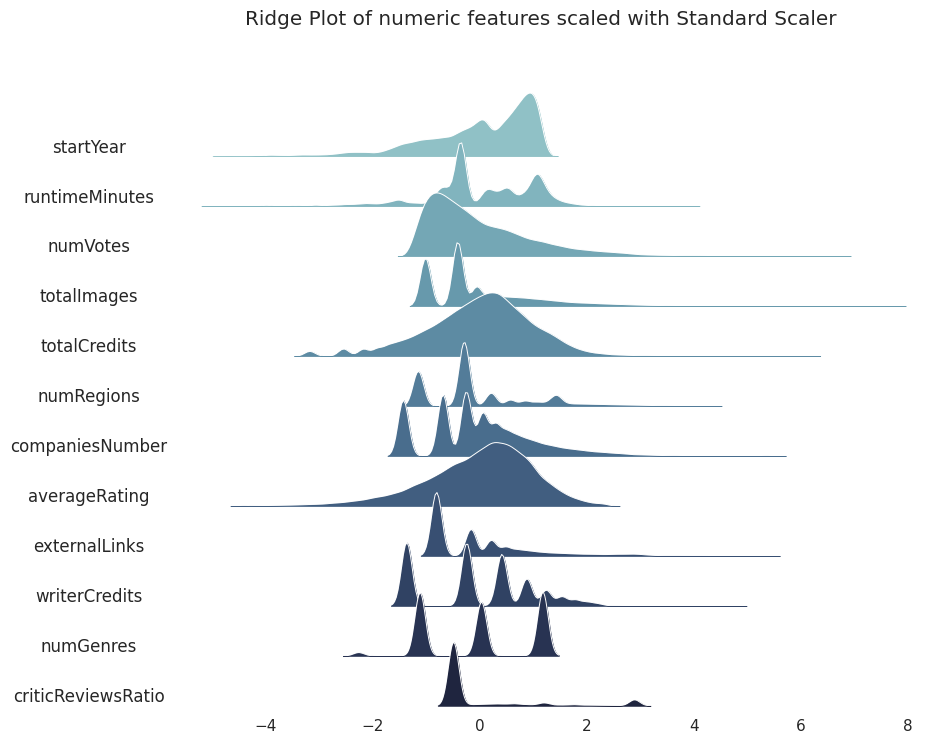

In [15]:
make_ridge_plot(StandardScaler, 'Standard Scaler')

## Power Transformer

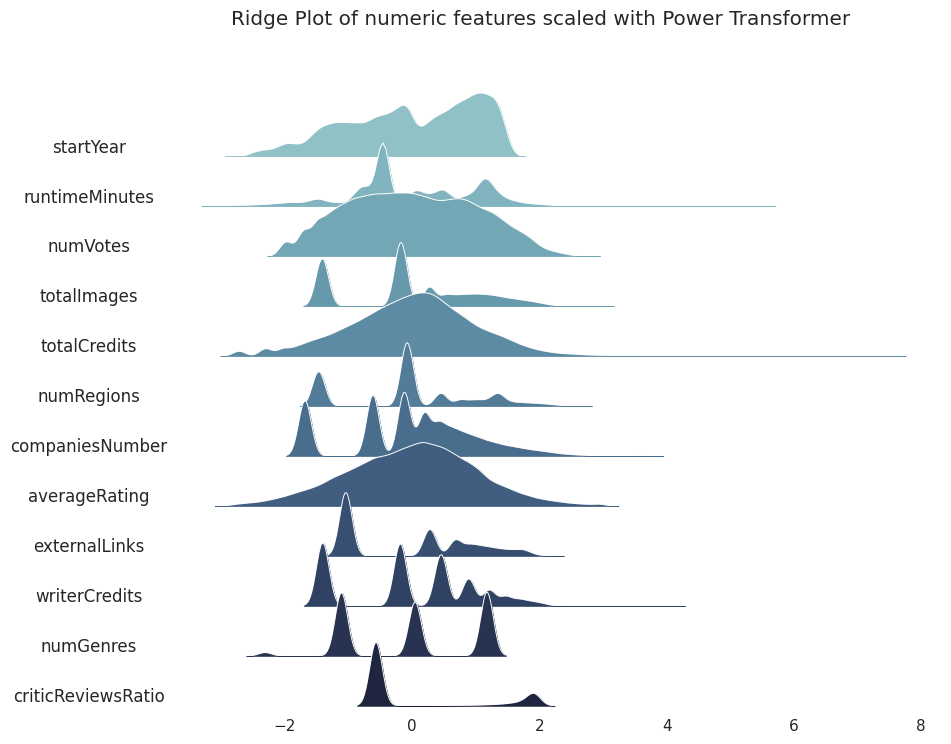

In [16]:
make_ridge_plot(PowerTransformer, 'Power Transformer')

Applies a power transformation to the original features in order to stabilize variance and minimize skewness.